In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import functools
import seaborn as sns

In [2]:
# Load csv and preview
final_results = pd.read_csv('output_data/alcohol_vs_happiness.csv')
final_results


,Unnamed: 0,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
0,0,Luxembourg,114110.0,23.0,0.913,82.1,17,6.910,1.576,10.94,4.03,2.21,4.70,0.00
1,1,Singapore,97745.0,11.0,0.936,83.5,34,6.343,1.529,1.85,1.25,0.27,0.30,0.04
2,2,Qatar,94503.0,45.0,0.845,80.1,32,6.374,1.649,1.02,0.30,0.64,0.08,0.01
3,3,Ireland,83471.0,2.0,0.951,82.1,14,6.977,1.448,11.20,5.12,2.32,2.90,0.85
4,4,Switzerland,68479.0,2.0,0.955,83.6,5,7.487,1.420,9.51,3.17,1.65,4.23,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,Mozambique,1290.0,181.0,0.452,60.2,123,4.417,0.198,1.24,1.00,0.21,0.03,0.01
129,129,Niger,1196.0,189.0,0.391,62.0,134,4.166,0.131,0.13,0.04,0.07,0.02,0.00
130,130,Malawi,1043.0,174.0,0.478,63.8,147,3.587,0.186,2.00,0.17,0.19,0.02,1.61
131,131,Central African Republic,933.0,188.0,0.395,52.8,155,3.083,0.024,0.88,0.51,0.03,0.02,0.32


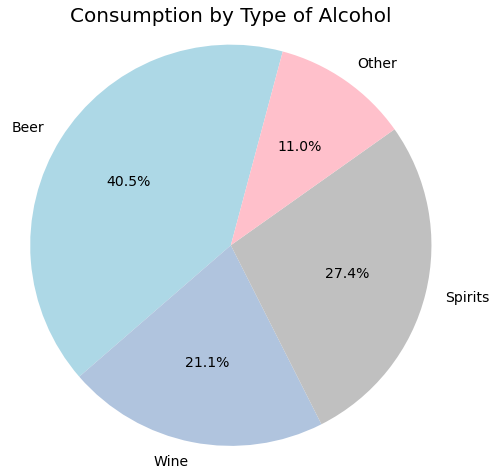

In [16]:
# Calculate mean and create pie chart
alcohol_mean = final_results[["Beer", "Wine", "Spirits", "Other"]].mean()
alcohol_mean
my_colors = ['lightblue','lightsteelblue','silver',"pink"]
plot =alcohol_mean.plot.pie(subplots=True, figsize=(8,8), colors = my_colors, startangle=75, label='', shadow = False, autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title ("Consumption by Type of Alcohol", fontsize=20)
plt.axis('equal')
plt.show()

In [10]:
# Sort for Top 5 countries Alcohol Consumption - All Types
top_five_countires_sort = final_results.sort_values(["All types"], ascending=False)
top_five_countires_sort = top_five_countires_sort.iloc[0:5,:]
top_five_countires_sort

,Unnamed: 0,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
38,38,Latvia,29942.0,37.0,0.863,75.2,53,5.933,1.148,12.60,5.30,5.10,1.40,0.80
119,119,Uganda,2122.0,159.0,0.538,63.0,135,4.161,0.322,12.20,0.84,0.61,0.01,10.73
11,11,Austria,55687.0,18.0,0.921,81.4,12,7.139,1.341,11.80,6.40,1.90,3.60,0.00
31,31,Lithuania,35390.0,34.0,0.876,75.7,50,5.952,1.197,11.49,4.47,4.75,0.80,1.46
49,49,Bulgaria,22181.0,56.0,0.813,74.9,100,4.933,1.054,11.42,4.32,5.20,1.73,0.16


In [11]:
# Sort for Bottom 5 countries Alcohol Consumption - All Types
Bottom_ten_countires_sort = final_results.sort_values(["All types"], ascending=True)
Bottom_ten_countires_sort = Bottom_ten_countires_sort.iloc[0:5,:]
Bottom_ten_countires_sort

,Unnamed: 0,Country,GDP (per capita PPP),HDI Rank,HDI,Life Expectancy,Overall rank,Score,GDP per capita,All types,Beer,Spirits,Wine,Other
100,100,Mauritania,5042.0,157.0,0.542,64.7,126,4.356,0.557,0.00,0.0,0.00,0.00,0.0
103,103,Bangladesh,4441.0,133.0,0.625,72.3,115,4.500,0.532,0.00,0.0,0.00,0.00,0.0
61,61,Libya,15018.0,105.0,0.721,72.7,70,5.566,0.985,0.01,0.0,0.00,0.01,0.0
105,105,Sudan,4161.0,170.0,0.506,65.1,137,4.139,0.605,0.01,0.0,0.01,0.00,0.0
15,15,Kuwait,50479.0,64.0,0.807,75.4,45,6.083,1.474,0.01,0.0,0.01,0.00,0.0


The Correlation Coefficient is: 0.4783032487181259


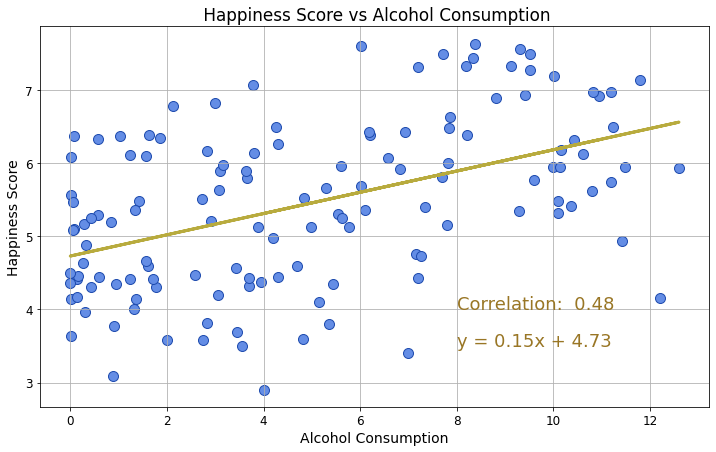

In [12]:
x_values = final_results["All types"]
y_values = final_results["Score"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(8, 3.5),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (8, 4), fontsize=18, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Alcohol Consumption")
plt.ylabel("Happiness Score")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title(" Happiness Score vs Alcohol Consumption")
plt.grid()
plt.show()

The Correlation Coefficient is: 0.608513088095513


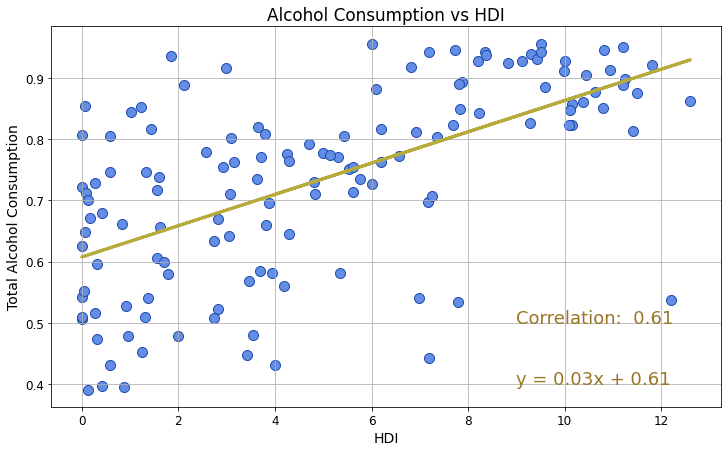

In [18]:
x_values = final_results["All types"]
y_values = final_results["HDI"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.figure(figsize=(12, 7))
plt.scatter(x_values,y_values, marker='o', facecolors="#648DE5", edgecolors="#1e4bae", s=100)

plt.plot(x_values,regress_values, color='#B8AB3E', linewidth=3)
plt.annotate(line_eq,(9, .4),fontsize=18,color="#997625")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (9, .5), fontsize=18, color='#997625')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("HDI")
plt.ylabel("Total Alcohol Consumption")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Alcohol Consumption vs HDI")
plt.grid()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

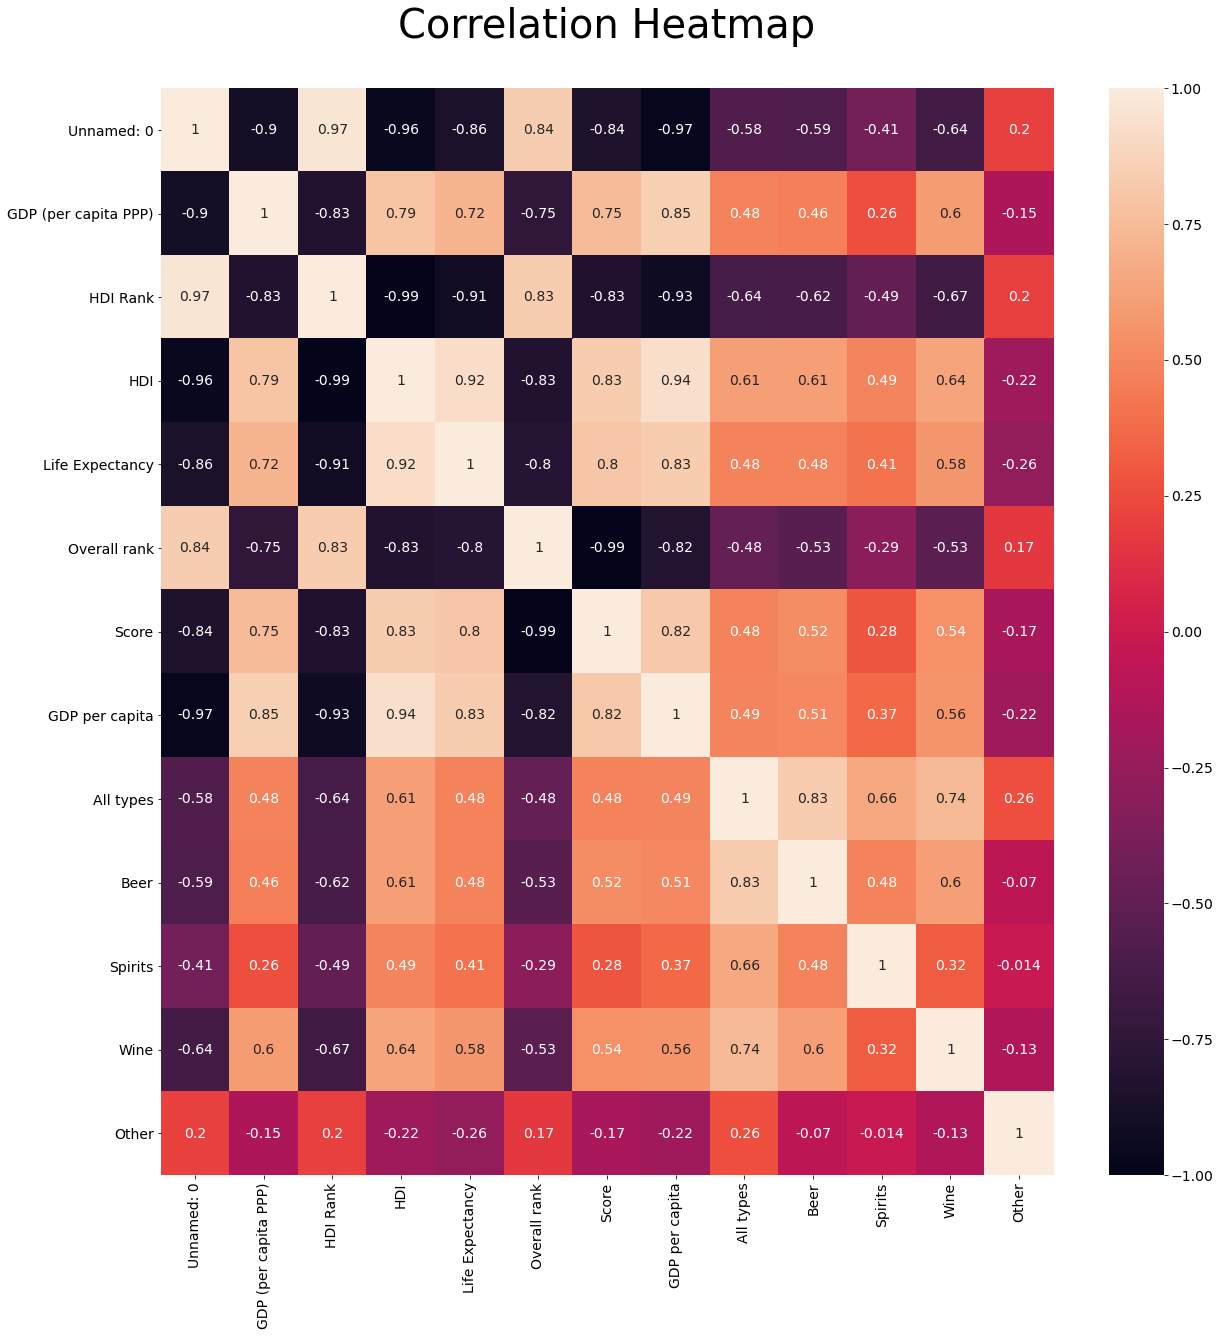

In [17]:
# Seaborn Hatmap Pearson Correlation - The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear 
# equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases 
# as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 
# implies that there is no linear correlation between the variables
plt.figure(figsize=(20, 20))
heatmap =sns.heatmap(final_results.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':40}, pad=50)


In [19]:
all_types_df = final_results[['Country',
                              'All types',
                              'Beer',
                              'Spirits',
                              'Wine',
                              'Other']]

# get min and max of all types
all_types_max = all_types_df['All types'].max()
all_types_min = all_types_df['All types'].min()
# print(f'max: {all_types_max}')
# print(f'min: {all_types_min}')

# find range of all types
all_types_range = all_types_max - all_types_min
# print(f'range: {all_types_range}')

# split range into 3 even groups using an increment
all_types_bin_increments = all_types_range / 3
# print(f'increments: {all_types_bin_increments}')

# create all types bins
all_types_bins = [all_types_min,
               all_types_min + all_types_bin_increments,
               all_types_min + (all_types_bin_increments * 2),
               all_types_max]
# print(all_types_bins)

# turn bin increments into strings for labels
bin_str_min = str(all_types_min)
bin_str_1 = str(all_types_min + all_types_bin_increments)
bin_str_2 = str(all_types_min + (all_types_bin_increments * 2))
bin_str_max = str(all_types_max)

# create bin labels
all_tyles_bin_labels = [f'Small: ({bin_str_min}-{bin_str_1})',
                        f'Medium: ({bin_str_1}-{bin_str_2})',
                        f'Large: ({bin_str_2}-{bin_str_max})']
print(all_tyles_bin_labels)

# name bin and separate rows into bins
all_types_df['Groups by Total Consumption'] = pd.cut(all_types_df['All types'],all_types_bins, labels=all_tyles_bin_labels, include_lowest=True)
all_types_df

# create group by bin
all_types_grouped_df = all_types_df.groupby('Groups by Total Consumption')
all_types_grouped_df.count()

# calculate averages by category
group_country_count = all_types_grouped_df['Country'].count()
group_avg_all = all_types_grouped_df['All types'].mean()
group_avg_beer = all_types_grouped_df['Beer'].mean()
group_avg_spirits = all_types_grouped_df['Spirits'].mean()
group_avg_wine = all_types_grouped_df['Wine'].mean()
group_avg_other = all_types_grouped_df['Other'].mean()

# create new grouped df
group_avg_df = pd.DataFrame({'Count of Countries': group_country_count,
                             'Average All Types': round(group_avg_all, 2),
                             'Average Beer': round(group_avg_beer, 2),
                             'Average Spirits': round(group_avg_spirits, 2),
                             'Average Wine': round(group_avg_wine, 2),
                             'Average Other': round(group_avg_other, 2)})

group_avg_df.reset_index(inplace=True)

group_avg_df

['Small: (0.0-4.2)', 'Medium: (4.2-8.4)', 'Large: (8.4-12.6)']


/Users/lauragabrielson/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Groups by Total Consumption,Count of Countries,Average All Types,Average Beer,Average Spirits,Average Wine,Average Other
0,Small: (0.0-4.2),66,1.72,0.71,0.68,0.10,0.23
1,Medium: (4.2-8.4),39,6.41,2.82,1.57,1.28,0.90
2,Large: (8.4-12.6),28,10.43,3.98,2.69,2.96,0.80


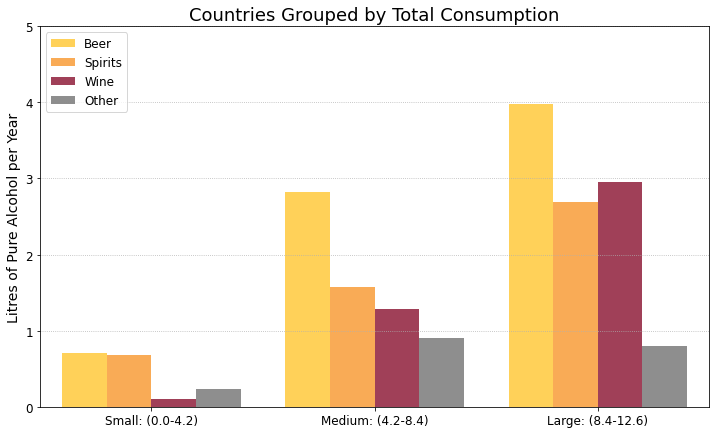

In [20]:
# Setting the positions and width for the bars
pos = list(range(len(group_avg_df['Count of Countries'])))
width = 0.2

# plot bars
fig, ax = plt.subplots(figsize=(12,7))
plt.bar(pos, 
        group_avg_df['Average Beer'], 
        width,
        alpha=0.75, 
        color='#FFC222',
        label=group_avg_df['Groups by Total Consumption'][0]) 

plt.bar([p + width for p in pos], 
        group_avg_df['Average Spirits'],
        width, 
        alpha=0.75, 
        color='#F78F1E', 
        label=group_avg_df['Groups by Total Consumption'][1]) 

plt.bar([p + width*2 for p in pos], 
        group_avg_df['Average Wine'],
        width, 
        alpha=0.75, 
        color='#800020', 
        label=group_avg_df['Groups by Total Consumption'][2])

plt.bar([p + width*3 for p in pos], 
        group_avg_df['Average Other'],
        width, 
        alpha=0.75, 
        color='#696969', 
        label=group_avg_df['Groups by Total Consumption'][2]) 

# format plot
plt.ylabel('Litres of Pure Alcohol per Year', fontsize=14)
plt.title('Countries Grouped by Total Consumption', fontsize=18)
plt.xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(group_avg_df['Groups by Total Consumption'], fontsize=12)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.ylim([0, 5])
plt.legend(['Beer', 'Spirits', 'Wine', 'Other'], loc='upper left', fontsize=12)
plt.grid(linestyle=':', axis='y')

plt.savefig('output_data/groupedbar.png')
plt.show()

In [21]:
low_alcohol = final_results.loc[final_results["All types"] < 4.2]
med_alcohol = final_results.loc[final_results["All types"] >= 4.2]
med_alcohol = med_alcohol.loc[med_alcohol["All types"] <= 8.4]
top_alcohol = final_results.loc[final_results["All types"] > 8.4]



print(low_alcohol["Score"].mean())
print(med_alcohol["Score"].mean())
print(top_alcohol["Score"].mean())

4.955333333333334
5.686512820512822
6.2600357142857135


In [35]:
all_anova = st.f_oneway(low_alcohol["Score"], med_alcohol["Score"], top_alcohol["Score"])
all_pvalue = all_anova[1]
print(all_pvalue)
med_top = st.f_oneway(med_alcohol["Score"], top_alcohol["Score"])
med_top_pvalue = med_top[1]
print(med_top_pvalue)
low_med = st.f_oneway(low_alcohol["Score"], med_alcohol["Score"])
low_med_pvalue = low_med[1]
print(low_med_pvalue)
low_top = st.f_oneway(low_alcohol["Score"], top_alcohol["Score"])
low_top_pvalue = low_top[1]
print(low_top_pvalue)

1.1384602477879347e-07
0.028028871858433866
0.0007469652455247747
2.3602037390507875e-08


pvalue = 1.1384602477879347e-07


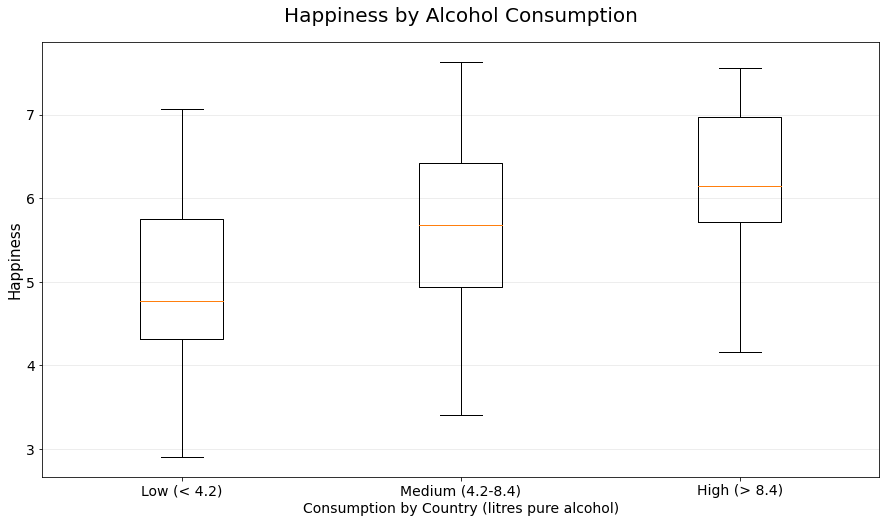

In [38]:
plot_final = [low_alcohol["Score"], med_alcohol["Score"], top_alcohol["Score"]]

fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.set_title('Happiness by Alcohol Consumption', fontsize=20, pad=20)
ax1.set_xlabel('Consumption by Country (litres pure alcohol)')
ax1.set_ylabel('Happiness', fontsize=15)
plt.rcParams['font.size'] = 14
ax1.boxplot(plot_final, labels=["Low (< 4.2)","Medium (4.2-8.4)","High (> 8.4)"])
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax1.set_axisbelow(True)
print(f'pvalue = {all_pvalue}')
# plt.savefig("../BoxWhisker.png")

plt.show()

In [39]:
all_anova = st.f_oneway(low_alcohol["Score"], med_alcohol["Score"], top_alcohol["Score"])
all_pvalue = all_anova[1]
print(f'pvalue of all groups {all_pvalue}')
med_top = st.f_oneway(med_alcohol["Score"], top_alcohol["Score"])
med_top_pvalue = med_top[1]
print(f' pvalue of medium vs top consumption {med_top_pvalue}')
low_med = st.f_oneway(low_alcohol["Score"], med_alcohol["Score"])
low_med_pvalue = low_med[1]
print(f' pvalue of low vs medium consumption {low_med_pvalue}')
low_top = st.f_oneway(low_alcohol["Score"], top_alcohol["Score"])
low_top_pvalue = low_top[1]
print(f' pvalue of top vs low consumption {low_top_pvalue}')

pvalue of all groups 1.1384602477879347e-07
 pvalue of medium vs top consumption 0.028028871858433866
 pvalue of low vs medium consumption 0.0007469652455247747
 pvalue of top vs low consumption 2.3602037390507875e-08
